# Image processing
## Noise reduction

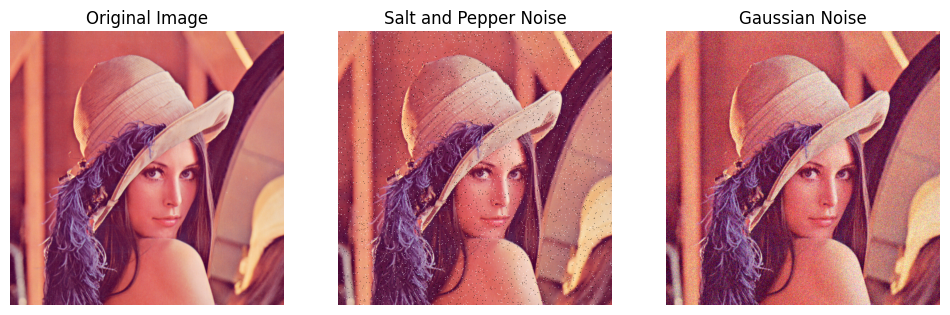

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

lenna_original = cv2.imread('./data/lenna_original.png')
lenna_snp = cv2.imread('./data/lenna_salt_pepper.png')
lenna_gauss = cv2.imread('./data/lenna_gaussian.png')

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(lenna_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(lenna_snp, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noise')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lenna_gauss, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')
plt.show()

### Mean filter

In [2]:
filter_size = 7
filter = np.ones((filter_size, filter_size), np.float32) / filter_size**2

#### Mean filter visualization

Text(0.5, 1.0, 'Mean Filter Kernel')

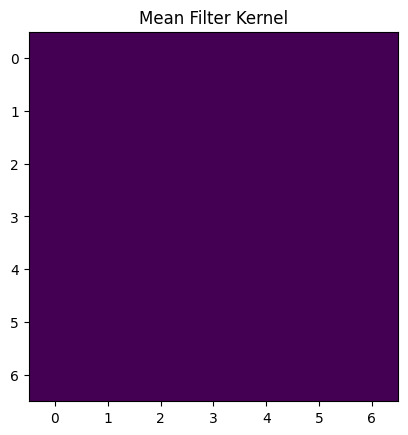

In [3]:
plt.imshow(filter)
plt.title('Mean Filter Kernel')

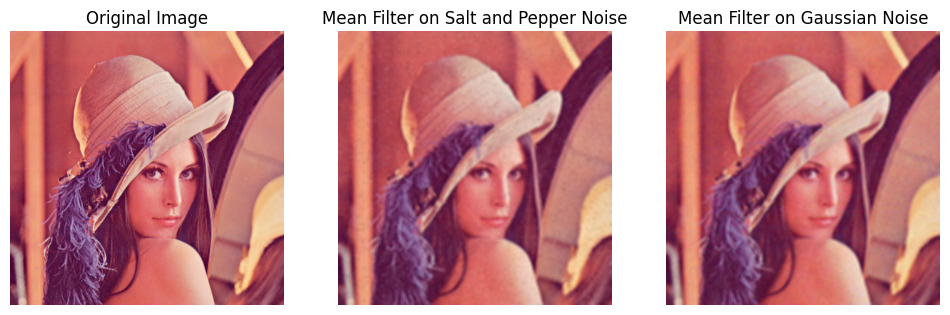

In [4]:
lenna_snp_mean = cv2.filter2D(lenna_snp, -1, filter)
lenna_gauss_mean = cv2.filter2D(lenna_gauss, -1, filter)
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(lenna_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(lenna_snp_mean, cv2.COLOR_BGR2RGB))
plt.title('Mean Filter on Salt and Pepper Noise')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lenna_gauss_mean, cv2.COLOR_BGR2RGB))
plt.title('Mean Filter on Gaussian Noise')
plt.axis('off')
plt.show()

### Median filter

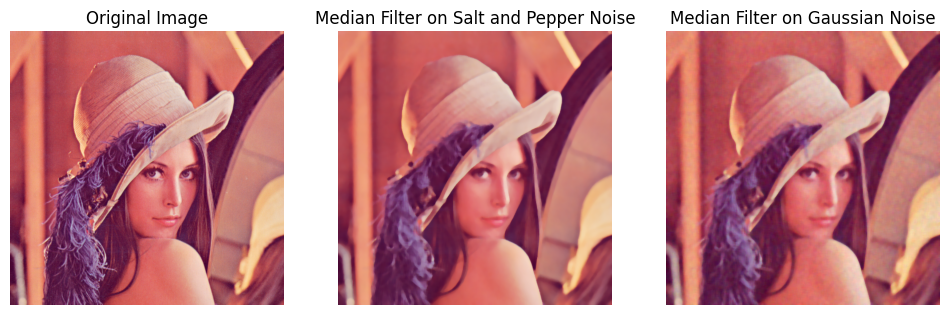

In [5]:
filter_size = 7

lenna_snp_median = cv2.medianBlur(lenna_snp, filter_size)
lenna_gauss_median = cv2.medianBlur(lenna_gauss, filter_size)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(lenna_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(lenna_snp_median, cv2.COLOR_BGR2RGB))
plt.title('Median Filter on Salt and Pepper Noise')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lenna_gauss_median, cv2.COLOR_BGR2RGB))
plt.title('Median Filter on Gaussian Noise')
plt.axis('off')
plt.show()


### Gaussian filter

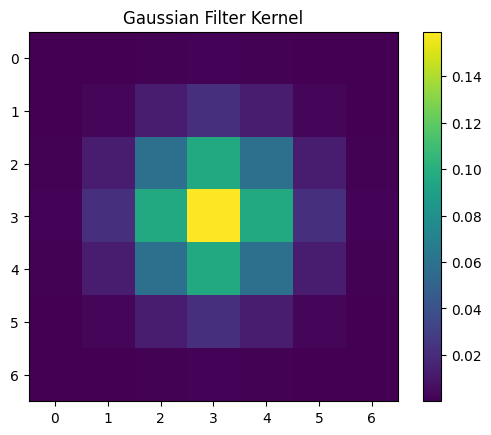

In [6]:
filter_size = 7
sigma = 1
filter = cv2.getGaussianKernel(filter_size, sigma)
filter = filter @ filter.T

plt.imshow(filter)
plt.title('Gaussian Filter Kernel')
plt.colorbar()
plt.show()

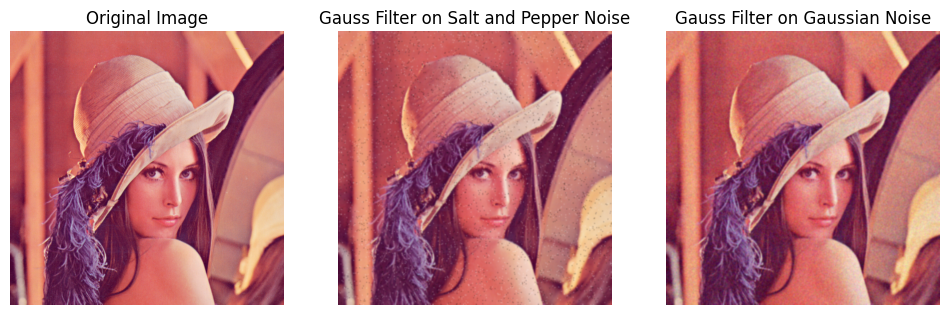

In [7]:
lenna_snp_gauss = cv2.GaussianBlur(lenna_snp, (filter_size, filter_size), sigma)
lenna_gauss_gauss = cv2.GaussianBlur(lenna_gauss, (filter_size, filter_size), sigma)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(lenna_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(lenna_snp_gauss, cv2.COLOR_BGR2RGB))
plt.title('Gauss Filter on Salt and Pepper Noise')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lenna_gauss_gauss, cv2.COLOR_BGR2RGB))
plt.title('Gauss Filter on Gaussian Noise')
plt.axis('off')
plt.show()

### Edge detection

#### Sobel filter

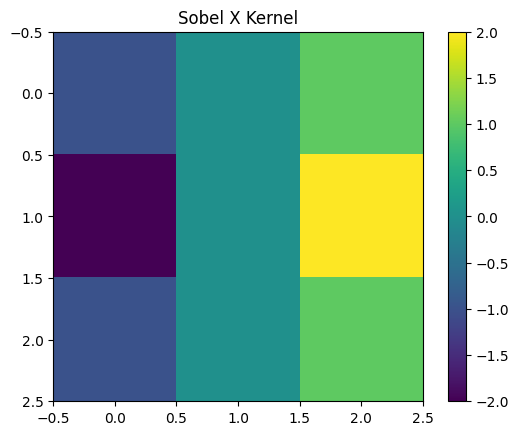

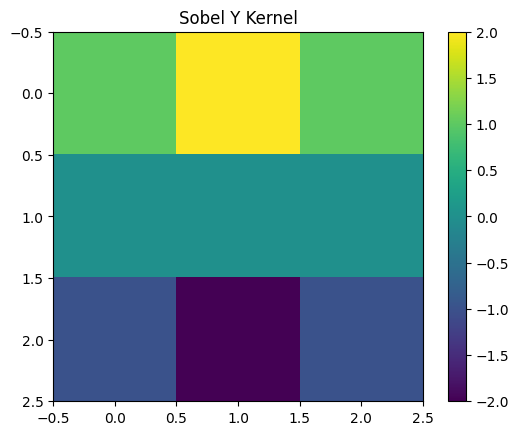

In [8]:
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]], dtype=np.float32)

plt.imshow(sobel_x)
plt.title('Sobel X Kernel')
plt.colorbar()
plt.show()

plt.imshow(sobel_y)
plt.title('Sobel Y Kernel')
plt.colorbar()
plt.show()



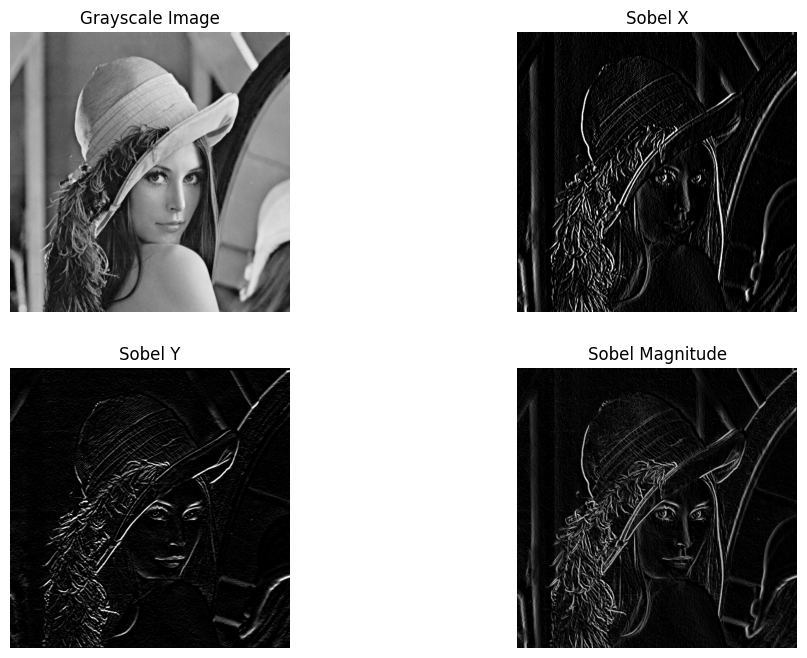

In [9]:
lenna_gray = cv2.cvtColor(lenna_original, cv2.COLOR_BGR2GRAY)
lenna_sobel_x = cv2.filter2D(lenna_gray, -1, sobel_x)
lenna_sobel_y = cv2.filter2D(lenna_gray, -1, sobel_y)
lenna_sobel = np.hypot(lenna_sobel_x, lenna_sobel_y)
lenna_sobel = (lenna_sobel / lenna_sobel.max() * 255).astype(np.uint8)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(lenna_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(lenna_sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(lenna_sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(lenna_sobel, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')
plt.show()

### Intensity quantization

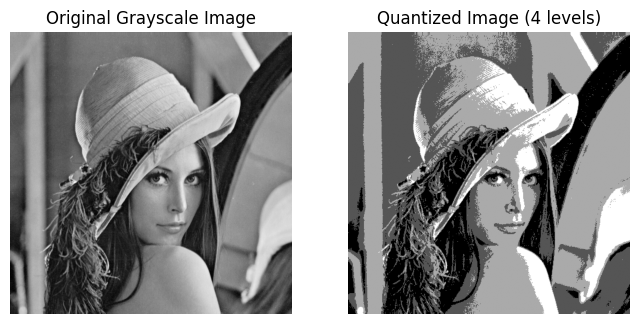

In [10]:
def quantize_image(image, levels):
    factor = 256 // levels
    quantized = (image // factor) * factor + factor // 2
    return quantized.astype(np.uint8)

levels = 4
lenna_quantized = quantize_image(lenna_gray, levels)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(lenna_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(lenna_quantized, cmap='gray')
plt.title(f'Quantized Image ({levels} levels)')
plt.axis('off')
plt.show()

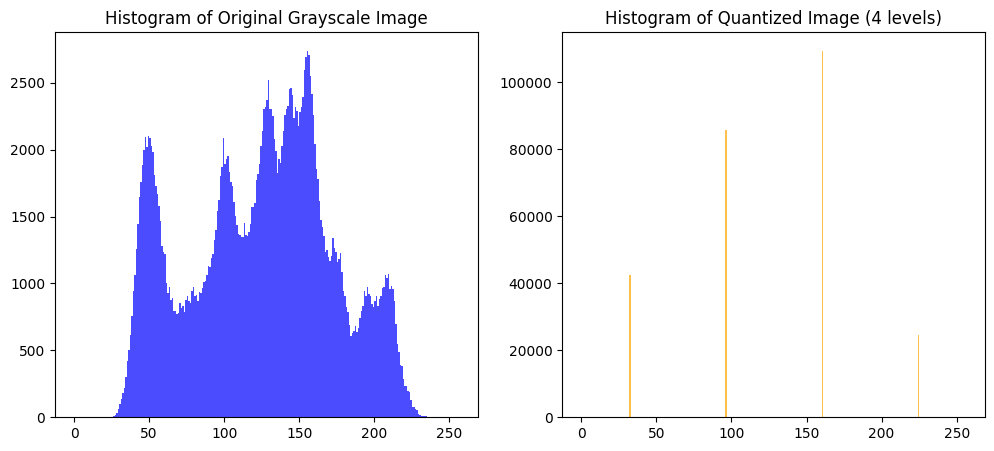

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(lenna_gray.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Histogram of Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.hist(lenna_quantized.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)
plt.title(f'Histogram of Quantized Image ({levels} levels)')
plt.show()

### Segmentation

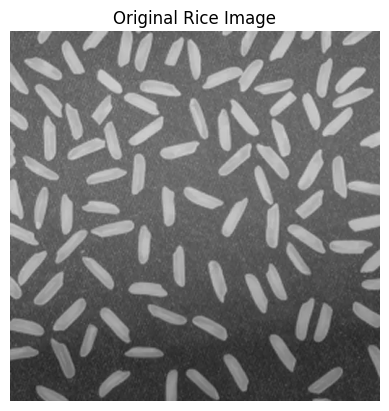

In [12]:
rice_original = cv2.imread('./data/rice.png')
plt.imshow(cv2.cvtColor(rice_original, cv2.COLOR_BGR2RGB))
plt.title('Original Rice Image')
plt.axis('off')
plt.show()

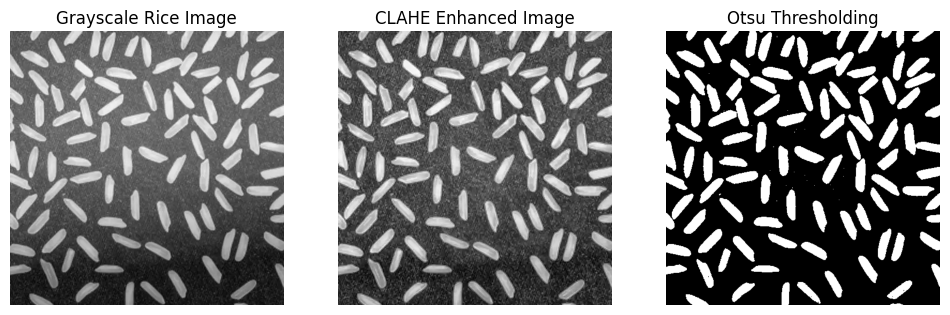

In [13]:
# Multi otsu
rice_gray = cv2.cvtColor(rice_original, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
rice_gray_enhanced = clahe.apply(rice_gray)


found_threshold, rice_otsu = cv2.threshold(rice_gray_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(rice_gray, cmap='gray')
plt.title('Grayscale Rice Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(rice_gray_enhanced, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(rice_otsu, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')
plt.show()

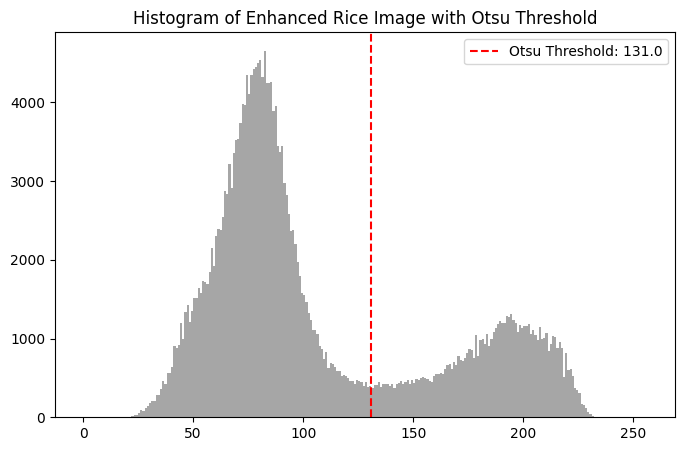

In [14]:
# Show histogram with Otsu threshold
plt.figure(figsize=(8, 5))
plt.hist(rice_gray_enhanced.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.axvline(x=found_threshold, color='red', linestyle='--', label=f'Otsu Threshold: {found_threshold}')
plt.title('Histogram of Enhanced Rice Image with Otsu Threshold')
plt.legend()
plt.show()

## Radiomic feature extraction

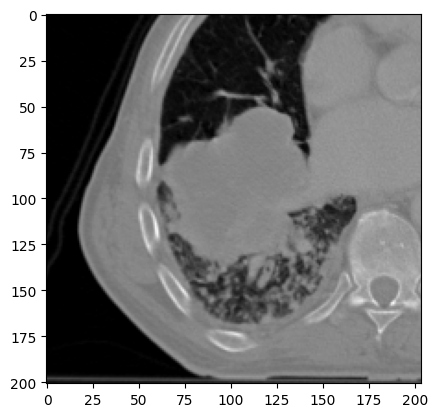

In [15]:
import nibabel as nib

image_slice = nib.load('./data/image_middle_slice.nii.gz').get_fdata()
mask_slice = nib.load('./data/mask_middle_slice.nii.gz').get_fdata()
mask_slice = cv2.flip(cv2.rotate(mask_slice, 2),0)
image_slice = cv2.flip(cv2.rotate(image_slice, 2),0)
plt.imshow(image_slice, cmap='gray')

### Resampling

In [16]:
import SimpleITK as sitk

def resample_image(image, new_spacing=(1.0, 1.0, 1.0), is_mask=False):
    orig_spacing = image.GetSpacing()
    orig_size = image.GetSize()

    new_size = [
        int(round(orig_size[i] * (orig_spacing[i] / new_spacing[i])))
        for i in range(3) # dimensions
    ]

    if is_mask:
        interpolator = sitk.sitkNearestNeighbor
    else:
        interpolator = sitk.sitkBSpline

    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetSize(new_size)
    resampler.SetInterpolator(interpolator)
    resampler.SetOutputOrigin(image.GetOrigin())
    resampler.SetOutputDirection(image.GetDirection())

    return resampler.Execute(image)

sitk_image = sitk.ReadImage('./data/image_middle_slice.nii.gz')
sitk_mask = sitk.ReadImage('./data/mask_middle_slice.nii.gz')
print(f'Original Image Spacing (mm): {sitk_image.GetSpacing()}')
print(f'Original Image Size: {sitk_image.GetSize()}')

# Resample both
sitk_image_resampled = resample_image(sitk_image, new_spacing=(1.0, 1.0, 1.0), is_mask=False)
mask_resampled = resample_image(sitk_mask, new_spacing=(1.0, 1.0, 1.0), is_mask=True)

Original Image Spacing (mm): (0.9769999980926514, 0.9769999980926514, 3.0)
Original Image Size: (204, 201, 1)


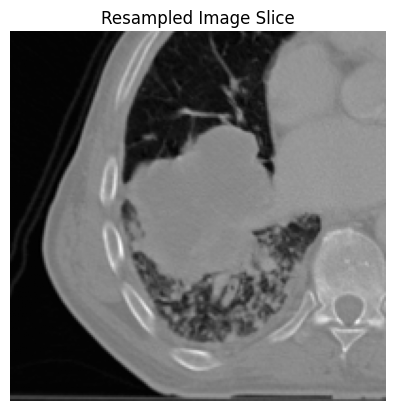

New Spacing (mm): (1.0, 1.0, 1.0)
New Size: (199, 196, 3)


In [17]:
sitk_image_resampled_np = sitk.GetArrayFromImage(sitk_image_resampled)
plt.imshow(sitk_image_resampled_np[1, :, :], cmap='gray')
plt.title('Resampled Image Slice')
plt.axis('off')
plt.show()
print("New Spacing (mm):", sitk_image_resampled.GetSpacing())
print("New Size:", sitk_image_resampled.GetSize())

### Shape Feature
Extract area, perimeter, and roundness of the tumor. Use 2D shape feature definitions from the lecture.

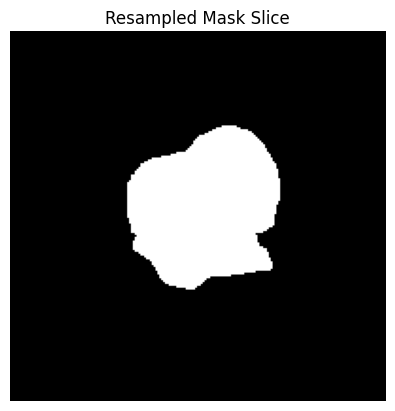

New Spacing (mm): (1.0, 1.0, 1.0)
New Size: (199, 196, 3)


In [18]:
plt.imshow(sitk.GetArrayFromImage(mask_resampled)[1, :, :], cmap='gray')
plt.title('Resampled Mask Slice')
plt.axis('off')
plt.show()
print("New Spacing (mm):", mask_resampled.GetSpacing())
print("New Size:", mask_resampled.GetSize())

In [19]:
mask_resampled_np = sitk.GetArrayFromImage(mask_resampled)[1, :, :]

# find out if white is 1 or something else
print(np.unique(mask_resampled_np))

[0 1]


In [20]:
# Area
area = np.sum(mask_resampled_np)
print(area)# pixel area in mm^2

5235


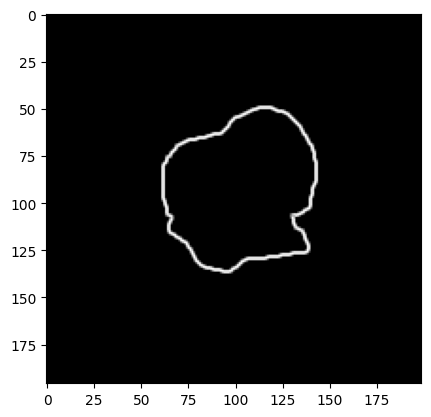

In [21]:
# Perimeter

sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]], dtype=np.float32)


def apply_filter(image, filter):
    edges = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i == 0 or i == image.shape[0]-1 or j == 0 or j == image.shape[1]-1:
                edges[i, j] = 0
            else:
                edges[i, j] = (image[i-1:i+2, j-1:j+2] * filter).sum()
    return edges
        
edges_x = apply_filter(mask_resampled_np, sobel_x)
edges_y = apply_filter(mask_resampled_np, sobel_y)

edges = np.hypot(edges_x, edges_y)

plt.imshow(edges, cmap='gray')
plt.show()

In [22]:
print(f'Unique Values: {np.unique(edges)}')
print(f'Mean Value: {np.mean(edges)}')
print(f'Max Value: {np.max(edges)}')
print(f'Median Value: {np.median(edges)}')

Unique Values: [0.        1.4142135 2.        3.1622777 4.        4.2426405 4.472136 ]
Mean Value: 0.05980275943875313
Max Value: 4.4721360206604
Median Value: 0.0


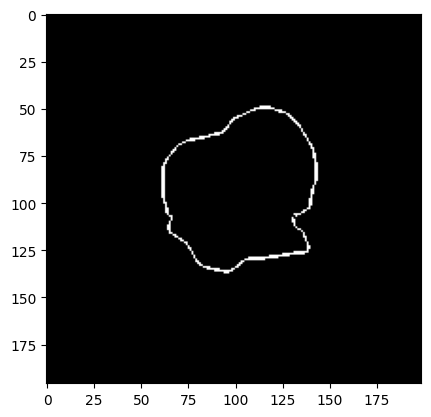

In [23]:
# filter
perimeter = np.where(edges > np.unique(edges)[3], 1, 0)
plt.imshow(perimeter, cmap='gray')
plt.show()

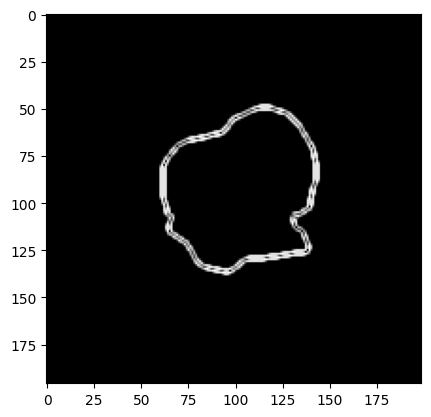

In [24]:
edges_x = apply_filter(perimeter, sobel_x)
edges_y = apply_filter(perimeter, sobel_y)

perimeter = np.hypot(edges_x, edges_y)

plt.imshow(perimeter, cmap='gray')
plt.show()

In [25]:
print(f'Unique Values: {np.unique(perimeter)}')
print(f'Mean Value: {np.mean(perimeter)}')
print(f'Max Value: {np.max(perimeter)}')
print(f'Median Value: {np.median(perimeter)}')

Unique Values: [0.        1.4142135 2.        2.828427  3.1622777 4.        4.2426405
 4.472136 ]
Mean Value: 0.08656322211027145
Max Value: 4.4721360206604
Median Value: 0.0


#### Different approach max filter

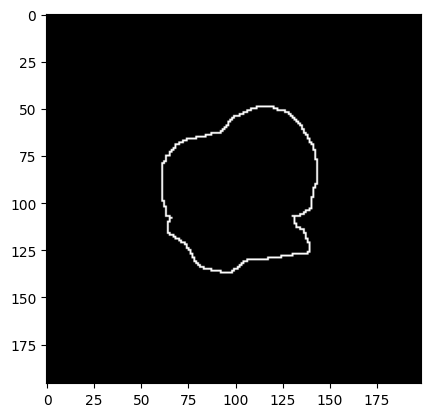

360.0


In [26]:
def apply_filter(image, filter):
    edges = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i == 0 or i == image.shape[0]-1 or j == 0 or j == image.shape[1]-1:
                edges[i, j] = 0
            else:
                edges[i, j] = image[i-1:i+2, j-1:j+2].max()
    return edges

perimeter = apply_filter(mask_resampled_np, None)

plt.imshow(perimeter-mask_resampled_np, cmap='gray')
plt.show()

perimeter_value = np.sum(perimeter-mask_resampled_np)
print(perimeter_value)

In [27]:
# Circularity

circularity = (4 * np.pi * area) / (perimeter_value ** 2)
print(circularity)

0.5075999241216842


### Intensity Features
Extract one intensity-based feature from the ROI (e.g. mean, standard deviation, skewness).Use the feature definition from the lecture or IBSI I.

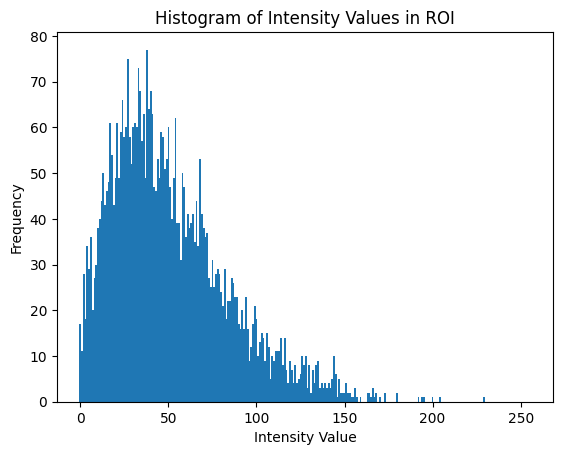

In [28]:
# hist
filtered_img = np.where(mask_resampled_np==1, sitk.GetArrayFromImage(sitk_image_resampled)[1, :, :], np.nan)

hist, bin_edges = np.histogram(filtered_img, bins=256, range=(0, 256))
plt.bar(bin_edges[:-1], hist, width=1)
plt.title('Histogram of Intensity Values in ROI')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

In [29]:
mean = np.mean(filtered_img, where=~np.isnan(filtered_img))
std = np.std(filtered_img, where=~np.isnan(filtered_img))
skewness = (np.mean((filtered_img - mean)**3, where=~np.isnan(filtered_img))) / (std**3)
kurtosis = (np.mean((filtered_img - mean)**4, where=~np.isnan(filtered_img))) / (std**4)
print(f'Mean: {mean}, Standard Deviation: {std}, Skewness: {skewness}, Kurtosis: {kurtosis}')

Mean: 10.295662042852113, Standard Deviation: 141.4526965076512, Skewness: -3.8552378881146128, Kurtosis: 19.906087432904478


### Texture Features
In this exercise we will extract a GLCM-based texture features. Before calculating the texturematrix we need to perform image quantization. Implement the following pipeline:
1. Quantize the image. You can choose fixed bin number or fixed bin size discretization. 
2. Calculate GLCM matrix in one direction
3. Extract at least one texture feature or your choice (e.g. contrast, entropy, correlation)

Use the feature definition from the lecture or IBSI I.

In [30]:
print(f'Unique Values: {np.unique(sitk_image_resampled_np)}')

Unique Values: [-1028.9866162  -1028.9866162  -1026.66757826 ...   943.36359742
   957.26463685   957.26463685]


Unique Values: [-1024.  -768.  -512.  -256.     0.   256.    nan]


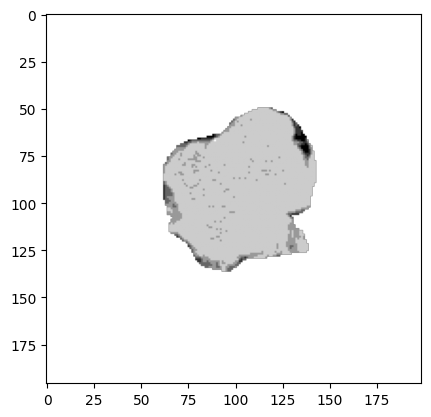

In [35]:
filtered_img = np.where(mask_resampled_np==1, sitk_image_resampled_np[1,:,:], np.nan)
bin_size = 256
quantized_img = np.where(mask_resampled_np==1, (filtered_img // bin_size) * bin_size, np.nan)
print(f'Unique Values: {np.unique(quantized_img)}')
plt.imshow(quantized_img, cmap="gray")
plt.show()

In [42]:
glcm = np.zeros((len(np.unique(quantized_img)), len(np.unique(quantized_img))), dtype=np.int32)
glcm.shape

(7, 7)

In [45]:
for i in range(quantized_img.shape[0]):
    for j in range(quantized_img.shape[1]-1):
        r = quantized_img[i, j]      # reference pixel
        c = quantized_img[i, j+1]    # right neighbor
        glcm[i, j] += 1
        
glcm = glcm + glcm.T  # Make symmetric

plt.imshow(glcm, cmap='hot')
plt.title('GLCM Matrix')
plt.colorbar()
plt.show()

IndexError: index 7 is out of bounds for axis 1 with size 7